In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#reading the dataset
data = pd.read_csv(r"C:\Users\Manik325\Desktop\Thesis Data\Thessis Dataset\USA_latest\us_states_covid19_daily.csv")

In [4]:
df = data.groupby("date")["positive", "death", "recovered"].sum().reset_index()
df

,date,positive,death,recovered
0,20200122,2.0,0.0,0.0
1,20200123,2.0,0.0,0.0
2,20200124,2.0,0.0,0.0
3,20200125,2.0,0.0,0.0
4,20200126,2.0,0.0,0.0
5,20200127,2.0,0.0,0.0
6,20200128,2.0,0.0,0.0
7,20200129,3.0,0.0,0.0
8,20200130,3.0,0.0,0.0
9,20200131,3.0,0.0,0.0


In [5]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

In [6]:
df["date"]

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
5     2020-01-27
6     2020-01-28
7     2020-01-29
8     2020-01-30
9     2020-01-31
10    2020-02-01
11    2020-02-02
12    2020-02-03
13    2020-02-04
14    2020-02-05
15    2020-02-06
16    2020-02-07
17    2020-02-08
18    2020-02-09
19    2020-02-10
20    2020-02-11
21    2020-02-12
22    2020-02-13
23    2020-02-14
24    2020-02-15
25    2020-02-16
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
         ...    
174   2020-07-14
175   2020-07-15
176   2020-07-16
177   2020-07-17
178   2020-07-18
179   2020-07-19
180   2020-07-20
181   2020-07-21
182   2020-07-22
183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
188   2020-07-28
189   2020-07-29
190   2020-07-30
191   2020-07-31
192   2020-08-01
193   2020-08-02
194   2020-08-03
195   2020-08-04
196   2020-08-05
197   2020-08-06
198   2020-08-07
199   2020-08-08
200   2020-08-09
201   2020-08-

In [9]:
df['Days'] = df.index - df.index[0]

In [10]:
df


,date,positive,death,recovered,Days
0,2020-01-22,2.0,0.0,0.0,0
1,2020-01-23,2.0,0.0,0.0,1
2,2020-01-24,2.0,0.0,0.0,2
3,2020-01-25,2.0,0.0,0.0,3
4,2020-01-26,2.0,0.0,0.0,4
5,2020-01-27,2.0,0.0,0.0,5
6,2020-01-28,2.0,0.0,0.0,6
7,2020-01-29,3.0,0.0,0.0,7
8,2020-01-30,3.0,0.0,0.0,8
9,2020-01-31,3.0,0.0,0.0,9


In [11]:
# Scaling the X
X = np.array(df['Days']).reshape(-1,1)

In [12]:
X_train = X[:194]
X_train

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
# Scaling the Y
Y_Confirmed = np.array(df['positive']).reshape(-1,1)

In [15]:
Y_Confirmed


array([[2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [4.000000e+00],
       [6.000000e+00],
       [7.000000e+00],
       [8.000000e+00],
       [8.000000e+00],
       [1.100000e+01],
       [1.200000e+01],
       [1.300000e+01],
       [1.300000e+01],
       [1.600000e+01],
       [1.700000e+01],
       [1.800000e+01],
       [1.800000e+01],
       [2.100000e+01],
       [2.800000e+01],
       [3.500000e+01],
       [5.000000e+01],
       [5.900000e+01],
       [6.900000e+01],
       [8.200000e+01],
       [9.300000e+01],
       [1.060000e+02],
       [1.220000e+02],
       [1.480000e+02],
       [1.790000e+02],
       [2.080000e+02],
       [2.350000e+02],
       [2.750000e+02],
       [2.990000e+02],
       [3.880000e+02],
       [4.700000e+02],
       [5.700000e+02],
       [7.570000e+02],
       [9.1

In [16]:
Y_Confirmed_train = Y_Confirmed[:194]
Y_Confirmed_train

array([[2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [4.000000e+00],
       [6.000000e+00],
       [7.000000e+00],
       [8.000000e+00],
       [8.000000e+00],
       [1.100000e+01],
       [1.200000e+01],
       [1.300000e+01],
       [1.300000e+01],
       [1.600000e+01],
       [1.700000e+01],
       [1.800000e+01],
       [1.800000e+01],
       [2.100000e+01],
       [2.800000e+01],
       [3.500000e+01],
       [5.000000e+01],
       [5.900000e+01],
       [6.900000e+01],
       [8.200000e+01],
       [9.300000e+01],
       [1.060000e+02],
       [1.220000e+02],
       [1.480000e+02],
       [1.790000e+02],
       [2.080000e+02],
       [2.350000e+02],
       [2.750000e+02],
       [2.990000e+02],
       [3.880000e+02],
       [4.700000e+02],
       [5.700000e+02],
       [7.570000e+02],
       [9.1

In [17]:
Y_Confirmed_Test = Y_Confirmed[194:]
Y_Confirmed_Test

array([[4694126.],
       [4745694.],
       [4797959.],
       [4852143.],
       [4913663.],
       [4967754.],
       [5019073.],
       [5060880.],
       [5116474.],
       [5172509.]])

In [36]:
lin_reg = LinearRegression(normalize= True)
lin_reg.fit(X_train, Y_Confirmed_train)

LinearRegression(normalize=True)

In [37]:
list1 = [204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223]

list1_array = np.array(list1).reshape(-1,1)
X_pred = (np.append(X,list1_array)).reshape(-1,1)

In [38]:
X_pred

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [39]:
predicted_value = lin_reg.predict(X_pred)

In [40]:
predicted_value

array([[-888584.3666931 ],
       [-865969.70630431],
       [-843355.04591553],
       [-820740.38552674],
       [-798125.72513796],
       [-775511.06474917],
       [-752896.40436038],
       [-730281.7439716 ],
       [-707667.08358281],
       [-685052.42319403],
       [-662437.76280524],
       [-639823.10241645],
       [-617208.44202767],
       [-594593.78163888],
       [-571979.1212501 ],
       [-549364.46086131],
       [-526749.80047253],
       [-504135.14008374],
       [-481520.47969495],
       [-458905.81930617],
       [-436291.15891738],
       [-413676.4985286 ],
       [-391061.83813981],
       [-368447.17775102],
       [-345832.51736224],
       [-323217.85697345],
       [-300603.19658467],
       [-277988.53619588],
       [-255373.87580709],
       [-232759.21541831],
       [-210144.55502952],
       [-187529.89464074],
       [-164915.23425195],
       [-142300.57386316],
       [-119685.91347438],
       [ -97071.25308559],
       [ -74456.59269681],
 

In [41]:
prediction_until_204 = predicted_value[194:204]
prediction_until_204

array([[3498659.74873137],
       [3521274.40912016],
       [3543889.06950894],
       [3566503.72989773],
       [3589118.39028651],
       [3611733.0506753 ],
       [3634347.71106409],
       [3656962.37145287],
       [3679577.03184166],
       [3702191.69223044]])

In [42]:
# Mean Absolute Error
mean_absolute_error(Y_Confirmed_Test, prediction_until_204)

1333601.7795190928

In [43]:
# Mean Squared Error
mse = mean_squared_error(Y_Confirmed_Test, prediction_until_204)
mse

1786206857016.548

In [44]:
# Root Mean Squared Error
rmse = sqrt(mse)
rmse

1336490.500159484

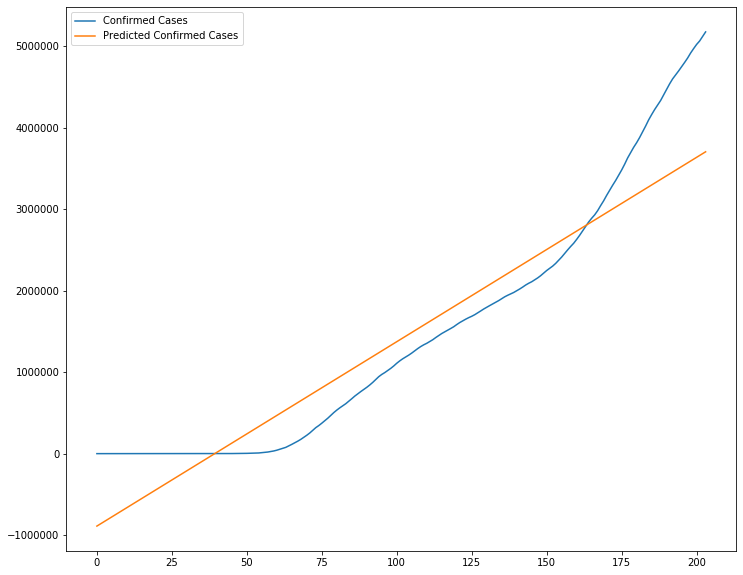

In [45]:
plt.figure(figsize=(12,10))
plt.plot(df['positive'], label = 'Confirmed Cases')
plt.plot( predicted_value[:204], label = 'Predicted Confirmed Cases')

plt.legend()
plt.show()

In [99]:
# Polynomial Regression Starts
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, Y_Confirmed_train)

PolynomialFeatures(degree=3)

In [100]:
X_poly

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02],
       [1.000000e+00, 1.000000e+01, 1.000000e+02, 1.000000e+03],
       [1.000000e+00, 1.100000e+01, 1.210000e+02, 1.331000e+03],
       [1.000000e+00, 1.200000e+01, 1.440000e+02, 1.728000e+03],
       [1.000000e+00, 1.300000e+01, 1.690000e+02, 2.197000e+03],
       [1.000000e+00, 1.400000e+01, 1.960000e+02, 2.744000e+03],
       [1.000000e+00, 1.5

In [101]:

lin_reg2 = LinearRegression(normalize= True)
lin_reg2.fit(X_poly, Y_Confirmed_train)
pred_poly = poly.fit_transform(X_pred)
poly_predicted_value_pred = lin_reg2.predict(pred_poly)

In [102]:
poly_predicted_value_pred

array([[-3.16966552e+04],
       [-3.43374527e+04],
       [-3.67584081e+04],
       [-3.89587668e+04],
       [-4.09377743e+04],
       [-4.26946761e+04],
       [-4.42287175e+04],
       [-4.55391441e+04],
       [-4.66252013e+04],
       [-4.74861346e+04],
       [-4.81211894e+04],
       [-4.85296111e+04],
       [-4.87106452e+04],
       [-4.86635372e+04],
       [-4.83875325e+04],
       [-4.78818766e+04],
       [-4.71458149e+04],
       [-4.61785929e+04],
       [-4.49794560e+04],
       [-4.35476497e+04],
       [-4.18824194e+04],
       [-3.99830106e+04],
       [-3.78486687e+04],
       [-3.54786392e+04],
       [-3.28721676e+04],
       [-3.00284993e+04],
       [-2.69468797e+04],
       [-2.36265543e+04],
       [-2.00667685e+04],
       [-1.62667679e+04],
       [-1.22257978e+04],
       [-7.94310370e+03],
       [-3.41793108e+03],
       [ 1.35047463e+03],
       [ 6.36286797e+03],
       [ 1.16200035e+04],
       [ 1.71226357e+04],
       [ 2.28715193e+04],
       [ 2.8

In [103]:
# Mean Absolute Error 
mean_absolute_error(Y_Confirmed_Test, poly_predicted_value_pred[194:204])

210302.4888865863

In [106]:
# Mean Squared Error
mse_poly = mean_squared_error(Y_Confirmed_Test, poly_predicted_value_pred[194:204])
mse_poly

44302817495.90223

In [107]:
# Root Mean Squared Error
rmse_poly = sqrt(mse_poly)
rmse_poly

210482.34485557745

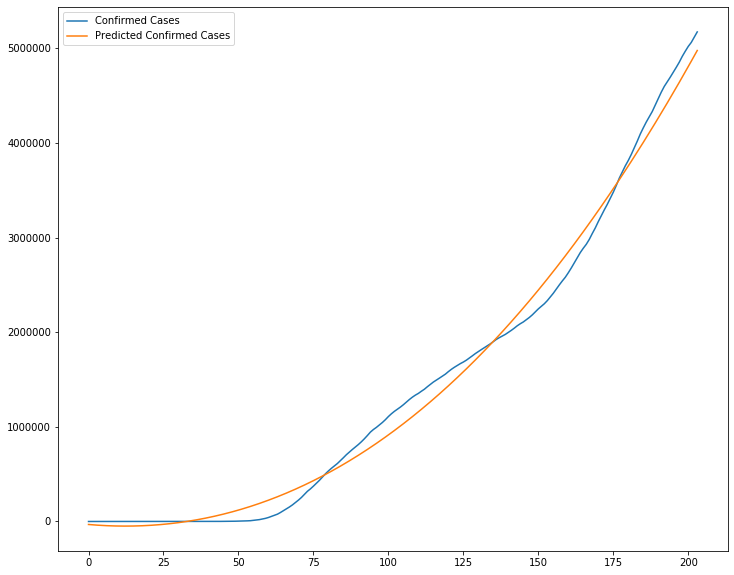

In [108]:
#degree 3
plt.figure(figsize=(12,10))
plt.plot(df['positive'], label = 'Confirmed Cases')
plt.plot(poly_predicted_value_pred[:204], label = 'Predicted Confirmed Cases')

plt.legend()
plt.show()

In [115]:
##Recovered cases 

Y_Recovered = np.array(df['recovered']).reshape(-1,1)


In [116]:
Y_Recovered_Train = Y_Recovered[:194]

In [117]:
Y_Recovered_Test = Y_Recovered[194:]

In [118]:
lin_reg_recovered = LinearRegression(normalize= True)
lin_reg_recovered.fit(X_train, Y_Recovered_Train)

LinearRegression(normalize=True)

In [119]:
predicted_value_recovered = lin_reg_recovered.predict(X_pred)

In [120]:
predicted_value_recovered

array([[-3.21762698e+05],
       [-3.14786613e+05],
       [-3.07810529e+05],
       [-3.00834444e+05],
       [-2.93858360e+05],
       [-2.86882275e+05],
       [-2.79906191e+05],
       [-2.72930106e+05],
       [-2.65954022e+05],
       [-2.58977937e+05],
       [-2.52001853e+05],
       [-2.45025768e+05],
       [-2.38049684e+05],
       [-2.31073599e+05],
       [-2.24097515e+05],
       [-2.17121430e+05],
       [-2.10145345e+05],
       [-2.03169261e+05],
       [-1.96193176e+05],
       [-1.89217092e+05],
       [-1.82241007e+05],
       [-1.75264923e+05],
       [-1.68288838e+05],
       [-1.61312754e+05],
       [-1.54336669e+05],
       [-1.47360585e+05],
       [-1.40384500e+05],
       [-1.33408416e+05],
       [-1.26432331e+05],
       [-1.19456247e+05],
       [-1.12480162e+05],
       [-1.05504078e+05],
       [-9.85279931e+04],
       [-9.15519085e+04],
       [-8.45758240e+04],
       [-7.75997395e+04],
       [-7.06236550e+04],
       [-6.36475704e+04],
       [-5.6

In [128]:
# recovered cases polynomial regression

poly_recovered = PolynomialFeatures(degree = 3) 
X_poly_recovered = poly_recovered.fit_transform(X_train)
poly_recovered.fit(X_poly_recovered, Y_Recovered_Train)

PolynomialFeatures(degree=3)

In [129]:

lin_reg2_recovred = LinearRegression(normalize= True)
lin_reg2_recovred.fit(X_poly_recovered, Y_Recovered_Train)
pred_poly_recovered = poly_recovered.fit_transform(X_pred)
poly_predicted_value_pred_recovered = lin_reg2_recovred.predict(pred_poly_recovered)

In [130]:
poly_predicted_value_pred_recovered

array([[ 4.11664854e+04],
       [ 3.78055484e+04],
       [ 3.45227340e+04],
       [ 3.13185579e+04],
       [ 2.81935361e+04],
       [ 2.51481842e+04],
       [ 2.21830180e+04],
       [ 1.92985534e+04],
       [ 1.64953061e+04],
       [ 1.37737919e+04],
       [ 1.11345266e+04],
       [ 8.57802599e+03],
       [ 6.10480587e+03],
       [ 3.71538202e+03],
       [ 1.41027022e+03],
       [-8.10013722e+02],
       [-2.94495403e+03],
       [-4.99403491e+03],
       [-6.95674058e+03],
       [-8.83255524e+03],
       [-1.06209631e+04],
       [-1.23214484e+04],
       [-1.39334953e+04],
       [-1.54565881e+04],
       [-1.68902109e+04],
       [-1.82338479e+04],
       [-1.94869835e+04],
       [-2.06491017e+04],
       [-2.17196868e+04],
       [-2.26982230e+04],
       [-2.35841946e+04],
       [-2.43770856e+04],
       [-2.50763804e+04],
       [-2.56815632e+04],
       [-2.61921181e+04],
       [-2.66075294e+04],
       [-2.69272812e+04],
       [-2.71508578e+04],
       [-2.7

In [131]:
# Mean Absolute Error
mean_absolute_error(Y_Recovered_Test, poly_predicted_value_pred_recovered[194:204])

60028.35846745064

In [132]:
# Mean Squared Error
mse_poly_recovered = mean_squared_error(Y_Recovered_Test, poly_predicted_value_pred_recovered[194:204])
mse_poly_recovered

3783847487.8701296

In [133]:
# Root Mean Squared Error
rmse_poly_recovred = sqrt(mse_poly_recovered)
rmse_poly_recovred

61512.98633516446

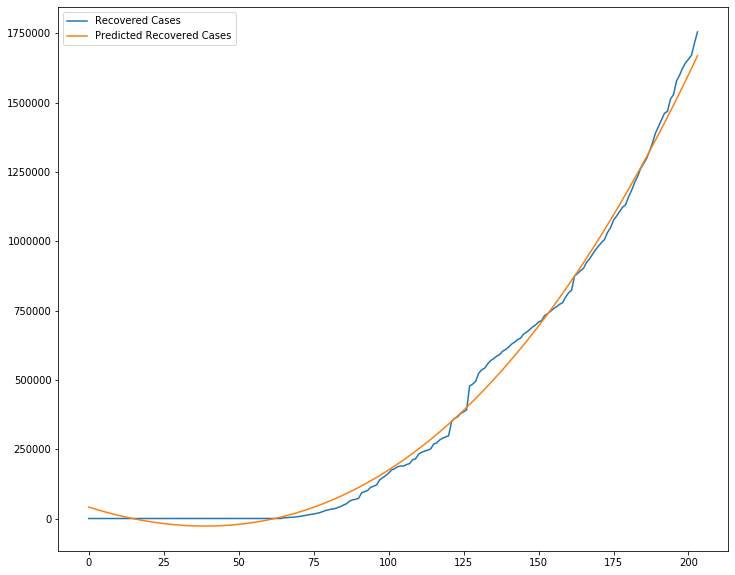

In [134]:
plt.figure(figsize=(12,10))
plt.plot(df['recovered'], label = 'Recovered Cases')
plt.plot(poly_predicted_value_pred_recovered[:204], label = 'Predicted Recovered Cases')

plt.legend()
plt.show()

In [135]:
##Death cases 
Y_Death = np.array(df['death']).reshape(-1,1)

In [136]:
Y_Death_Train = Y_Death[:194]

In [137]:
Y_Death_Test = Y_Death[194:]

In [166]:
Y_Death_Test

array([[147631.],
       [148807.],
       [150232.],
       [151483.],
       [152816.],
       [153905.],
       [154521.],
       [154947.],
       [156273.],
       [157776.]])

In [138]:
lin_reg_death = LinearRegression(normalize= True)
lin_reg_death.fit(X_train, Y_Death_Train)

LinearRegression(normalize=True)

In [139]:
predicted_value_death = lin_reg_death.predict(X_pred)

In [140]:
predicted_value_death

array([[-31224.07248216],
       [-30299.03754484],
       [-29374.00260752],
       [-28448.9676702 ],
       [-27523.93273288],
       [-26598.89779556],
       [-25673.86285825],
       [-24748.82792093],
       [-23823.79298361],
       [-22898.75804629],
       [-21973.72310897],
       [-21048.68817165],
       [-20123.65323434],
       [-19198.61829702],
       [-18273.5833597 ],
       [-17348.54842238],
       [-16423.51348506],
       [-15498.47854774],
       [-14573.44361043],
       [-13648.40867311],
       [-12723.37373579],
       [-11798.33879847],
       [-10873.30386115],
       [ -9948.26892383],
       [ -9023.23398651],
       [ -8098.1990492 ],
       [ -7173.16411188],
       [ -6248.12917456],
       [ -5323.09423724],
       [ -4398.05929992],
       [ -3473.0243626 ],
       [ -2547.98942529],
       [ -1622.95448797],
       [  -697.91955065],
       [   227.11538667],
       [  1152.15032399],
       [  2077.18526131],
       [  3002.22019863],
       [  39

In [159]:
# death cases polynomial regression

poly_death = PolynomialFeatures(degree = 2) 
X_poly_death = poly_death.fit_transform(X_train)
poly_death.fit(X_poly_death, Y_Death_Train)

PolynomialFeatures()

In [160]:
lin_reg2_death = LinearRegression(normalize= True)
lin_reg2_death.fit(X_poly_death, Y_Death_Train)
pred_poly_death = poly_death.fit_transform(X_pred)
poly_predicted_value_pred_death = lin_reg2_death.predict(pred_poly_death)

In [161]:
poly_predicted_value_pred_death

array([[-1.69693268e+04],
       [-1.64874445e+04],
       [-1.60009461e+04],
       [-1.55098316e+04],
       [-1.50141008e+04],
       [-1.45137539e+04],
       [-1.40087908e+04],
       [-1.34992116e+04],
       [-1.29850161e+04],
       [-1.24662045e+04],
       [-1.19427767e+04],
       [-1.14147328e+04],
       [-1.08820726e+04],
       [-1.03447963e+04],
       [-9.80290383e+03],
       [-9.25639517e+03],
       [-8.70527033e+03],
       [-8.14952933e+03],
       [-7.58917215e+03],
       [-7.02419879e+03],
       [-6.45460926e+03],
       [-5.88040356e+03],
       [-5.30158168e+03],
       [-4.71814363e+03],
       [-4.13008941e+03],
       [-3.53741901e+03],
       [-2.94013243e+03],
       [-2.33822968e+03],
       [-1.73171076e+03],
       [-1.12057567e+03],
       [-5.04824395e+02],
       [ 1.15543050e+02],
       [ 7.40526668e+02],
       [ 1.37012646e+03],
       [ 2.00434243e+03],
       [ 2.64317457e+03],
       [ 3.28662288e+03],
       [ 3.93468737e+03],
       [ 4.5

In [162]:
# Mean Absolute Error
mean_absolute_error(Y_Death_Test, poly_predicted_value_pred_death[194:204])

16349.904072166446

In [163]:
# Mean Squared Error
mse_poly_death = mean_squared_error(Y_Death_Test, poly_predicted_value_pred_death[194:204])
mse_poly_death

268305449.94407368

In [164]:
# Root Mean Squared Error
rmse_poly_death = sqrt(mse_poly_death)
rmse_poly_death

16380.032049543544

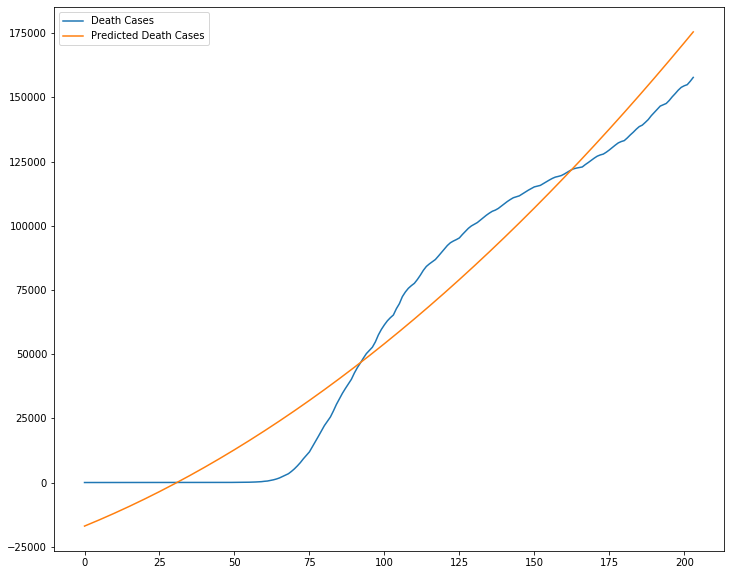

In [165]:
plt.figure(figsize=(12,10))
plt.plot(df['death'], label = 'Death Cases')
plt.plot(poly_predicted_value_pred_death[:204], label = 'Predicted Death Cases')

plt.legend()
plt.show()